In [239]:
import sys
sys.path.append('../python/')
import asteriks as ak
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from scipy.ndimage.filters import gaussian_filter1d
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [306]:
c = ak.Channel(8,71,'/Volumes/cupertino/c8-newthreshold_database/',tol=10)
c.find_close()

  0%|          | 0/3853 [00:00<?, ?it/s]/Users/ch/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
../python/asteriks.py:182: RuntimeWarning: invalid value encountered in less
  nearby[c] = sok
100%|██████████| 3853/3853 [02:11<00:00, 29.26it/s]


In [307]:
a = ak.Asteroid('1999 VG135',c)

3853it [00:02, 1856.88it/s]
3853it [00:02, 1705.45it/s]


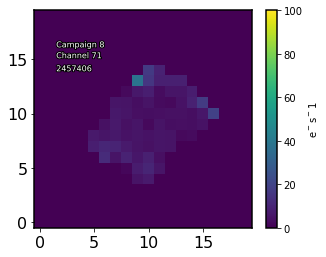

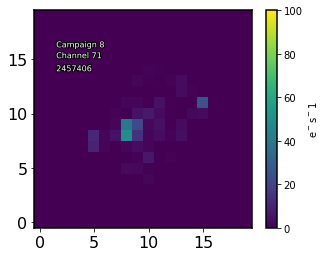

In [300]:
c.query_hdf5(a.ra_lag,a.dec_lag,20*u.arcsec)
c.movie(cadence=np.arange(0,700,1),scale='linear',vmin=0,vmax=100,outfile='lag_dyna.mp4')
c.query_hdf5(a.ra,a.dec,20*u.arcsec)
c.movie(cadence=np.arange(0,700,1),scale='linear',vmin=0,vmax=100,outfile='asteroid_dyna.mp4')

In [308]:
r=4
c.query_hdf5(a.ra,a.dec,20*u.arcsec)
t=np.arange(c.ncad)
track = c.track(t)
f = c.lightcurve(track,cadence=t,r=r,difference=True,plot=False)
f_bad = c.lightcurve(track,cadence=t,r=r,difference=False)

c.query_hdf5(a.ra_lag,a.dec_lag,20*u.arcsec)
f_lag = c.lightcurve(track,cadence=t,r=r,difference=True)

3853it [00:02, 1847.61it/s]
3853it [00:02, 1691.60it/s]


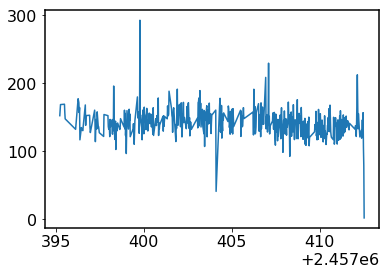

In [309]:
ok = np.isfinite(f) & np.isfinite(f_lag) & (f!=0)
x,y,z = t[ok], f[ok], f_lag[ok]
ok = np.abs(z)<50
ok = np.isclose(gaussian_filter1d(ok.astype(float),0.5),1,1E-6)

lag = np.interp(0.5,c.time-c.time[0],np.arange(c.ncad))
ok = np.interp(x+lag,x,ok).astype(bool)

plt.plot(c.time[x[ok]],y[ok])


In [311]:
new={'time':c.time[x[ok]],'flux':y[ok]}

In [303]:
dyna={'time':c.time[x[ok]],'flux':y[ok]}

In [297]:
mast={'time':c.time[x[ok]],'flux':y[ok]}

In [312]:
results={'mast':mast,'dyna':dyna,'new':new}

In [313]:
import pickle
pickle.dump(results,open('1999VG135.p','wb'))